# Projeto de C318

Equipe: 
- Antonio Adami Palma
- Gustavo Alves Esteves
- Gustavo Teixeira Simões
</br></br>
---
</br>

#### Objetivo
Prever a temperatura média de um local baseado nas temperaturas máxima e mínima previstas para o dia.

</br>

#### Regras de negócio

- É possível prever a temperatura média com base nas temperaturas máxima e mínima previstas para o dia?

</br>

#### Tipo de problema
Regressão Linear

</br>

#### Enquadramento
Aprendizagem supervisionada


## Importação e download de bibliotecas

#### Download da biblioteca klib

In [1]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Importação das bibliotecas utilizadas

In [2]:
import klib
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Importação dos dados

Os dados utilizados para o modelo foram retirados de um dataset que traz as condições climaticas durante cada dia da Segunda Guerra Mundial.

O dataset pode ser encontrado no seguinte link: 
- https://www.kaggle.com/code/mathchi/3-lr-mlr-pr-dt-rf-predict-data-weather-conditions/data

In [3]:
# Importação do arquivo csv
data=pd.read_csv('weather.csv')

# Print do dataset
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Informações iniciais

A seguir trouxemos algumas informações sobre o conteúdo do dateset

In [4]:
# Informações do dataframe através do atributo "info"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

## Descrição estatística do dataframe pandas

In [5]:
# Descrição estatística do dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
STA,119040.0,29659.435795,20953.209402,10001.000000,11801.000000,22508.000000,33501.000000,82506.000000
WindGustSpd,532.0,37.774534,10.297808,18.520000,29.632000,37.040000,43.059000,75.932000
MaxTemp,119040.0,27.045111,8.717817,-33.333333,25.555556,29.444444,31.666667,50.000000
MinTemp,119040.0,17.789511,8.334572,-38.333333,15.000000,21.111111,23.333333,34.444444
MeanTemp,119040.0,22.411631,8.297982,-35.555556,20.555556,25.555556,27.222222,40.000000
YR,119040.0,43.805284,1.136718,40.000000,43.000000,44.000000,45.000000,45.000000
MO,119040.0,6.726016,3.425561,1.000000,4.000000,7.000000,10.000000,12.000000
DA,119040.0,15.797530,8.794541,1.000000,8.000000,16.000000,23.000000,31.000000
DR,533.0,26.998124,15.221732,2.000000,11.000000,32.000000,34.000000,78.000000
SPD,532.0,20.396617,5.560371,10.000000,16.000000,20.000000,23.250000,41.000000


Com os dados que  obtemos neste dataset, decidimos trabalhar apenas com 3: Temperatura máxima, temperatura mínima e temperatura média. A data informada também será extraída para podermos trabalhar com ela nos estudos estatísticos

Decidimos também reduzir o dataset aos primeiros 600 dados, uma vez que o número de dados inseridos no dataset é enorme e poderia tornar o trabalho do modelo de ML mais custoso e demorado.

In [6]:
# Extraindo 4 colunas ['MaxTemp','MinTemp', 'MeanTemp', 'Date'] e reduzindo para 600 linhas para podermos trabalhar melhor com dados mais relevantes do dataset

weather_df = data[['MaxTemp','MinTemp', 'MeanTemp', 'Date']][:][:600]
weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MaxTemp,600.0,29.870370,2.527832,21.111111,27.777778,30.555556,31.666667,35.000000
MinTemp,600.0,22.051852,1.358473,16.111111,21.111111,22.222222,22.777778,26.666667
MeanTemp,600.0,25.960185,1.701200,20.555556,24.444444,26.666667,27.222222,29.444444


### Observações:


##### Temperatura máxima: 
- Média: 27.045111
- Desvio Padrão: 8.717817
- Mínimo: -33.333333
- Máximo 50

##### Temperatura mínima: 
- Média: 17.789511
- Desvio Padrão: 8.334572
- Mínimo: -38.333333
- Máximo 34.444444

##### Temperatura média: 
- Média: 22.411631
- Desvio Padrão: 8.297982
- Mínimo: -35.555556
- Máximo 40

#### Número de dados nulos

In [7]:
weather_df.isnull().sum()

MaxTemp     0
MinTemp     0
MeanTemp    0
Date        0
dtype: int64

#### Temperaturas máximas, mínimas e médias ao longo do tempo

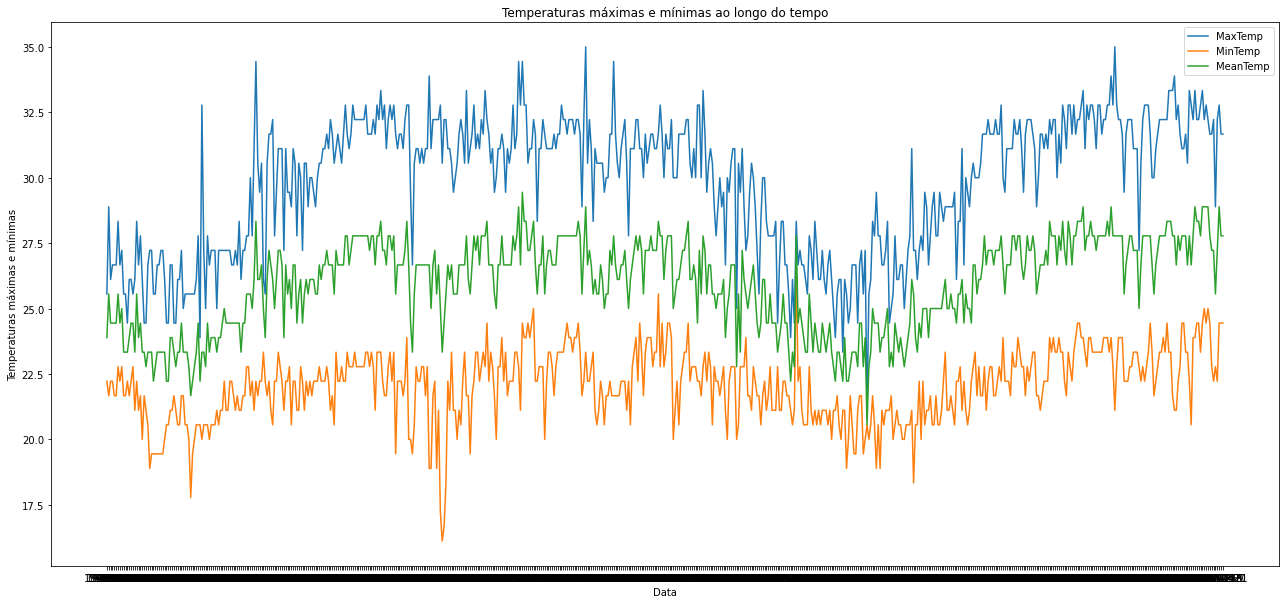

In [8]:
plt.figure(figsize=(22,10))
plt.plot(weather_df.Date, weather_df.MaxTemp, label="Temperatura máxima")
plt.plot(weather_df.Date, weather_df.MinTemp, label="Temperatura mínima")
plt.plot(weather_df.Date, weather_df.MeanTemp, label="Temperatura média")
plt.title("Temperaturas máximas e mínimas ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Temperaturas máximas e mínimas")
plt.legend(['MaxTemp', 'MinTemp', 'MeanTemp'])
plt.show()

## Matriz de Correlações

Para analisar a correlação entre as variáveis dos dados do conjunto de teste para ajudar a identificar as melhores variáveis para se trabalhar.

Para isso iremos utilizar o coeficiente de correlação de Pearson (p).

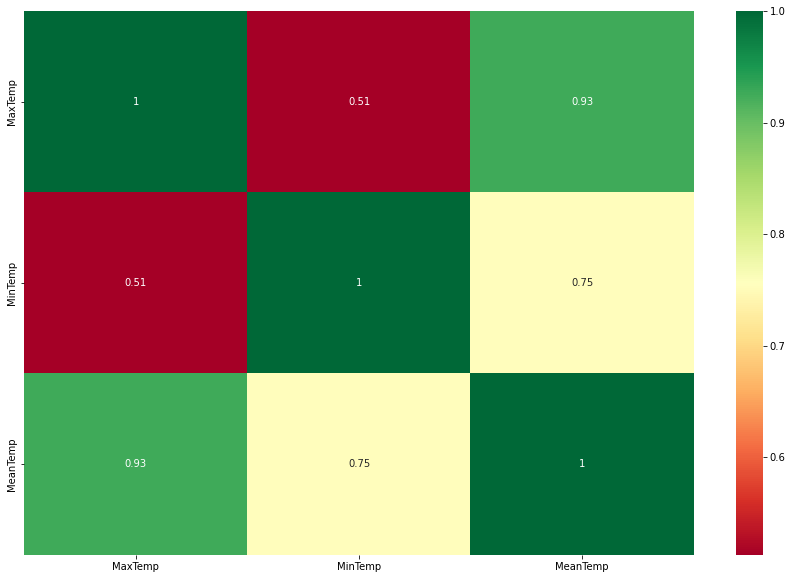

In [9]:
#Correlação das variáveis do dataframe
correlation_matrix = weather_df.corr(method='pearson')

plt.figure(figsize=(15,10))
top_corr_features = correlation_matrix.index
sns.heatmap(correlation_matrix[top_corr_features],annot=True,cmap="RdYlGn")

#### Versão simplificada da matriz de correlação

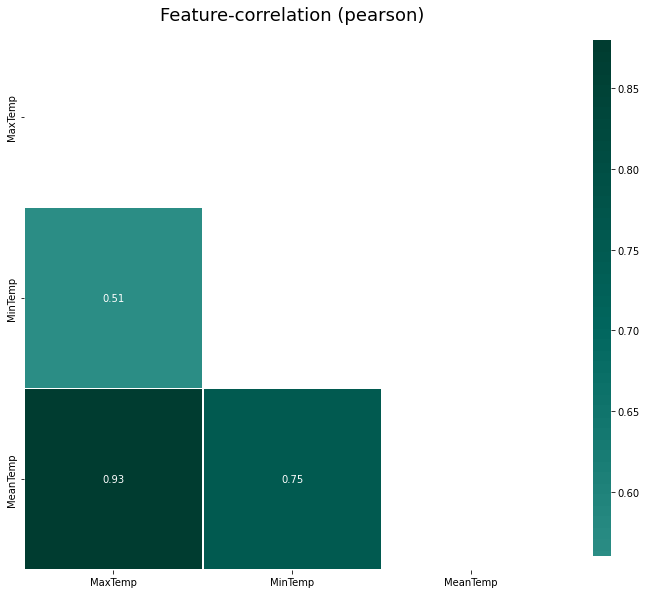

In [10]:
klib.corr_plot(weather_df)

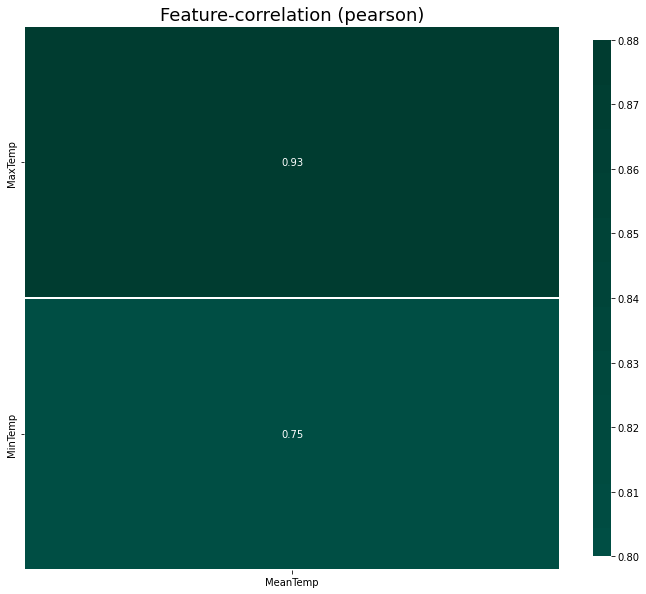

In [11]:
klib.corr_plot(weather_df, target='MeanTemp')

Visualizando os dados de correlação acima, fica claro há correlação entre a temperatura média e as temperaturas máxima e mínima, tornando assim possível realizar o modelo de ML com esses dados

## Amostragem

Para podermos ter dados para realizar o treinamento e para realizar os testes de predição, precisaremos separar amostras aleatórias dos nossos dados.

Para isso primeiro precisamos separar as variáveis de entrada x e y (temperatura máxima e temperatura mínima) e a variável de saída (Temperatura média).

Através do método train_test_split da biblioteca scikit-learn, poderemos separar essas amostras do nosso conjunto de dados.

Foi decidido que 15% do conjunto de dados será reservado para realização do treinamento e os outros 85% serão reservados para a realização dos testes.

Como a separação é feita de forma aleatória, o método pede uma "seed" para a geração da aleatoriedade. O valor escolhido pelo grupo foi o 36.

In [12]:
xy = np.array(weather_df.drop(['MeanTemp', 'Date'], axis=1)).reshape(-1, 2)
z = np.array(weather_df['MeanTemp']).reshape(-1, 1)

XY_train, XY_test, z_train, z_test = train_test_split(xy, z, test_size = 0.15, random_state = 36)

## Regressão Linear

Com as nossas amostras de treinamento e de testes separados, poderemos agora criar e treinar nosso modelo de ML.

O algoritmo escolhido para o nosso modelo foi o de Regressão Linear, que é um algoritmo de aprendizagem supervisionada que tentará descobrir uma equação linear que entrege os resultados desejados a partir das variáveis de entrada recebidas.

Utilizaremos a classe LinearRegression da bliblioteca scikit-learn para criar nosso modelo de ML.

Para realizar o treinamento do modelo há o método fit(), que recebe as amostras de entrada e de saída separadas para treinamento.

In [13]:
modelo = LinearRegression()  
modelo.fit(XY_train, z_train)

LinearRegression()

## Coeficiente de determinação (R²)

Através do coeficiente de determinação podemos medir o quão próximo os dados estão da linha de regressão ajustada, informando sempre um valor entre 0 e 1.

Quando mais próximo de 0 significa que o modelo não consegue explicar a variabilidade dos dados de resposta ao redor de sua média. Por consequência, quanto mais próximo de 1 significa que o modelo consegue explicar a variabilidade dos dados de resposta ao redor de sua média.

In [14]:
rScore = modelo.score(XY_train, z_train)
print(f"R² = {rScore}")

R² = 0.9596324834205405


Pode-se notar com o valor obtido que o nosso modelo consegue prever satisfatóriamente a variabilidade dos dados de resposta ao redor de sua média.

## Predição

Através do método predict() poderemos utilizar o modelo de regressão linear treinado anteriormente pra prever novos valores considerando os valores de entrada da amostra de dados separada para testes.

Com o resultado obtido, utilizaremos o método score() para avaliar a precisão da nossa predição, comparando com os valores de saída reais da nossa amostra de testes.

A precisão obtida foi bastante satisfatória, com um valor próximo de 99%

In [15]:
z_pred = modelo.predict(XY_test)                                     # Predict Linear Model
accuracy_score = modelo.score(XY_test, z_test)                       # Accuracy score
print("Precisão da predição: " + "{:.1%}".format(accuracy_score))

Precisão da predição: 98.6%


## Avaliação de desempenho

Para avaliar o desempenho, iremos utilizar do método mean_squared_error(), que nos entrega a Rriz quadrada do erro-médio (RMSE).

O resultado obtido foi bastante satisfatório, sendo bem próximo de 0.

In [16]:
rmse = mean_squared_error(z_test, z_pred)
print("RMSE: " +"{:.3}".format(rmse))

RMSE: 0.0424
